# Census income
## Budowa modeli

## 1. Importowanie danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score

Skorzystamy z danych po pre-processingu wykonanego w pliku **01_EDA.ipynb**.

In [2]:
data = pd.read_csv ('census_income_dataset_processed.csv')
data = data.drop('Unnamed: 0', axis=1)
data

,income_level,age,workclass,education_num,sex,capital_gain,capital_loss,hours_per_week,race_Black,race_White,race_other,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native_country_Mexico,native_country_United-States,native_country_other
0,0,39,6,13,1,2174.0,0.0,40.0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,50,5,13,1,0.0,0.0,13.0,0,1,0,1,0,0,0,0,0,0,1,0
2,0,38,3,9,1,0.0,0.0,40.0,0,1,0,0,1,0,0,0,0,0,1,0
3,0,53,3,7,1,0.0,0.0,40.0,1,0,0,1,0,0,0,0,0,0,1,0
4,0,28,3,13,0,0.0,0.0,40.0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,39,3,13,0,0.0,0.0,36.0,0,1,0,0,1,0,0,0,0,0,1,0
48838,0,64,3,9,1,0.0,0.0,40.0,1,0,0,0,0,1,0,0,0,0,1,0
48839,0,38,3,13,1,0.0,0.0,50.0,0,1,0,1,0,0,0,0,0,0,1,0
48840,0,44,3,13,1,5455.0,0.0,40.0,0,0,1,0,0,0,1,0,0,0,1,0


## 2. Podział danych

In [3]:
from sklearn.model_selection import train_test_split

y = data["income_level"]
X = data.drop("income_level", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=420, train_size=0.7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  random_state=420, train_size=0.7)

## 3. Tworzenie modeli

Jako miary skuteczności modeli postanowliśmy wybrać:
* accuracy
* recall i precision
* f1-score
* gini

Oprócz tego, wyniki będą zaprezentowane na krzywej ROC oraz na macierzy Confusiion Matrix.

In [4]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, plot_roc_curve

Metryki:

In [5]:
def metrics_scores(model, X_train, y_train):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    f1 = f1_score(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, y_pred)
    gini = (2*roc_auc)-1

    print("Accuracy:", accuracy,
          "\nRecall:", recall,
          "\nPrecision:", precision,
          "\nF1:", f1,
          "\nGini:", gini)

Reprezentacja Confusion Matrx dla danych treningowych i testowych:

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_cm(model, X_train, X_test, y_train, y_test):
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    fig, axs = plt.subplots(ncols=2)
    cm = ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train))
    cm.plot(colorbar=False, ax=axs[0])
    axs[0].set_title("Train")
    
    cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test))
    cm.plot(colorbar=False, ax=axs[1])
    axs[1].set_title("Test")
    plt.show()

Przetestowaliśmy kilka modeli:
* SVC
* Random Forest
* XGBoost
* Logistic Regression

W poprzedniej wersji analizowaliśmy rówież model Dummy Classifier, ale okazał się najmniej skuteczny, zatem już nie będziemy się nim zajmować.

##### SVC

In [7]:
from sklearn import svm
clf = svm.SVC()
metrics_scores(clf, X_train, y_train)

Accuracy: 0.8007234013512591 
Recall: 0.27462602314422807 
Precision: 0.7354497354497355 
F1: 0.3999177969584875 
Gini: 0.24312287282919653


C:\Users\laura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


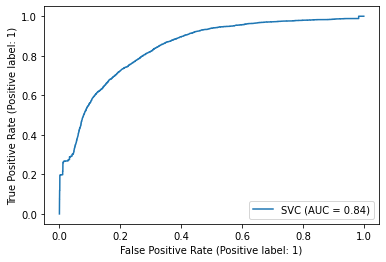

In [8]:
plot_roc_curve(clf, X_test, y_test)

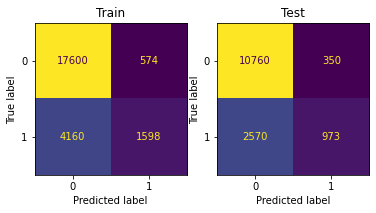

In [9]:
plot_cm(clf, X_train, X_test, y_train, y_test)

##### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
metrics_scores(rf, X_train, y_train)

Accuracy: 0.8417388930594417 
Recall: 0.6133220434659893 
Precision: 0.6960281870595771 
F1: 0.6520630157539384 
Gini: 0.5279035016118037


C:\Users\laura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


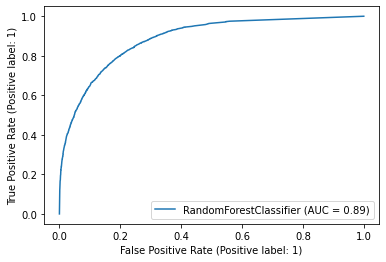

In [11]:
plot_roc_curve(rf, X_test, y_test)

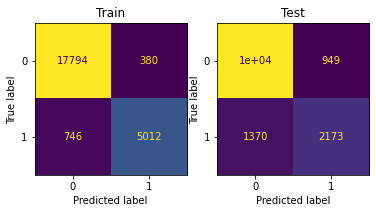

In [12]:
plot_cm(rf, X_train, X_test, y_train, y_test)

##### XGBoost

In [13]:
from xgboost import XGBClassifier
# xgb = XGBClassifier(objective="binary:logistic", seed = 42, use_label_encoder=False)
xgb = XGBClassifier()
metrics_scores(xgb, X_train, y_train)

C:\Users\laura\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\laura\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:24:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8622807616187811 
Recall: 0.6313858312164832 
Precision: 0.7585622244828756 
F1: 0.6891558841651263 
Gini: 0.5672994225756189


C:\Users\laura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


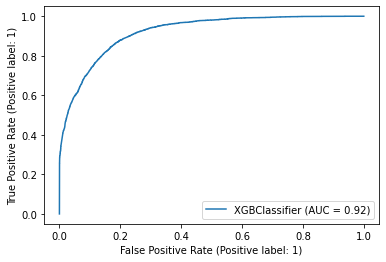

In [14]:
plot_roc_curve(xgb, X_test, y_test)

C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


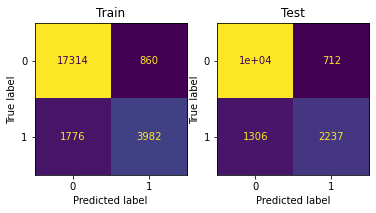

In [15]:
plot_cm(xgb, X_train, X_test, y_train, y_test)

##### Logisitc Regression

In [16]:
from sklearn.linear_model import LogisticRegression
# LR_model = LogisticRegression(random_state=420,n_jobs=-1)
LR_model = LogisticRegression()
metrics_scores(LR_model, X_train, y_train)

Accuracy: 0.8166245819968607 
Recall: 0.4826418289585097 
Precision: 0.6669266770670826 
F1: 0.5600130997216308 
Gini: 0.4057741421898329


C:\Users\laura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\laura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


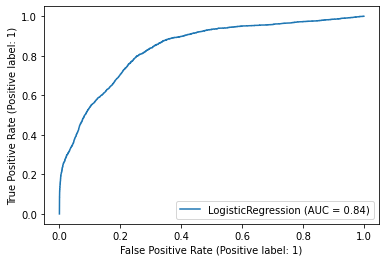

In [17]:
plot_roc_curve(LR_model, X_test, y_test)

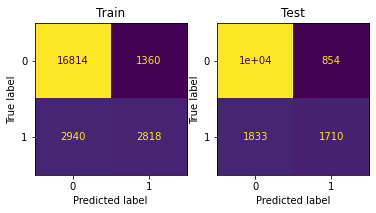

In [18]:
plot_cm(LR_model, X_train, X_test, y_train, y_test)

Spośród wybranych klasyfikatorów, na razie najlepiej wypadły **Random Forest** i **XGBoost**. Teraz spróbujemy dobrać ich hiperparametry w celu ulepszenia tych modeli oraz wyboru ostatecznego modelu.

## 4. Strojenie hiperparanetrów
W celu doboru odpowiednich hiperparametrów skorzystamy z **Grid Search'a**, aby optymalizować te wartości.

In [19]:
from sklearn.model_selection import GridSearchCV

##### Random Forest - hiperparametry

In [20]:
search_space = {"max_depth": [None, 2, 4, 8, 10],
               "n_estimators": [10,20,50,100],
               "class_weight": [None, "balanced", "balanced_subsample"]}

In [21]:
rf2 = RandomForestClassifier()

In [22]:
gscv = GridSearchCV(rf2, search_space, scoring="recall", verbose = 2, n_jobs=-1)

In [23]:
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'max_depth': [None, 2, 4, 8, 10],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='recall', verbose=2)

In [24]:
gscv.best_params_

{'class_weight': 'balanced_subsample', 'max_depth': 8, 'n_estimators': 50}

In [25]:
# rf2_best_estimator = gscv.best_estimator_
rf_best_estimator = RandomForestClassifier(class_weight='balanced',
                                           max_depth=8, n_estimators=100)

Porównanie wyników przed i po doborze hiperparametrów:

In [26]:
metrics_scores(rf, X_train, y_train)

Accuracy: 0.8424213471644032 
Recall: 0.6124753034151849 
Precision: 0.6986477784932389 
F1: 0.6527297337945556 
Gini: 0.5282268785727005


In [27]:
metrics_scores(rf_best_estimator, X_train, y_train)

Accuracy: 0.7964921859004982 
Recall: 0.8882303132938189 
Precision: 0.5489272632129775 
F1: 0.6785252263906857 
Gini: 0.6554670369661861


C:\Users\laura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


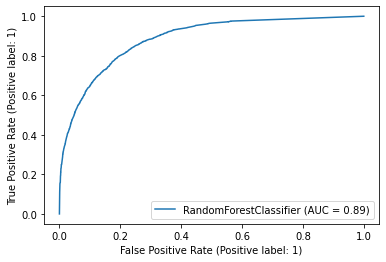

In [28]:
plot_roc_curve(rf, X_test, y_test)

C:\Users\laura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


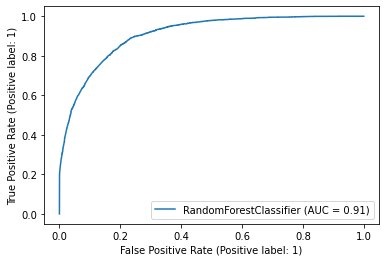

In [29]:
plot_roc_curve(rf_best_estimator, X_test, y_test)

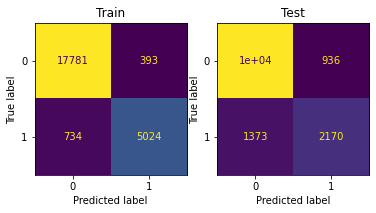

In [30]:
plot_cm(rf, X_train, X_test, y_train, y_test)

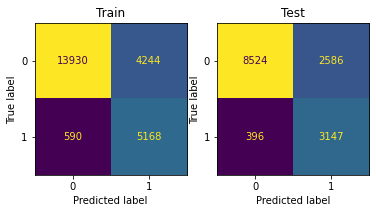

In [31]:
plot_cm(rf_best_estimator, X_train, X_test, y_train, y_test)

Strojenie hiperparametrów dało nam wynik AUC większy o 0.01 oraz widać po macierzach, iż zmiany te ulepszyły model. 

##### XGBoost - hiperparametry

In [32]:
search_space = {"max_depth": [None, 2, 4, 8, 10],
               "n_estimators": [10,20,50,100],
               "loss": [None, "deviance", "exponential"]}

In [33]:
xgb2 = XGBClassifier()

In [34]:
gscv = GridSearchCV(xgb2, search_space, scoring="recall", verbose = 2, n_jobs=-1)

In [35]:
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\laura\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [36]:
gscv.best_params_

{'loss': None, 'max_depth': 8, 'n_estimators': 100}

In [37]:
xgb_best_estimator = XGBClassifier(loss=None,
                                   max_depth=8, n_estimators=100)

In [38]:
metrics_scores(xgb, X_train, y_train)

[16:27:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8622807616187811 
Recall: 0.6313858312164832 
Precision: 0.7585622244828756 
F1: 0.6891558841651263 
Gini: 0.5672994225756189


In [39]:
metrics_scores(xgb_best_estimator, X_train, y_train)

[16:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\laura\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Accuracy: 0.8624172524397734 
Recall: 0.6347727914197008 
Precision: 0.7569841804106362 
F1: 0.6905127417869205 
Gini: 0.5697862927698361


C:\Users\laura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


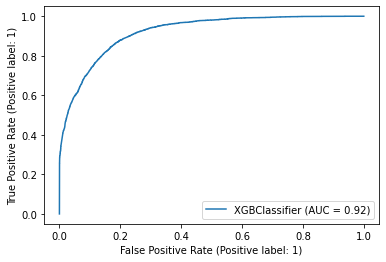

In [40]:
plot_roc_curve(xgb, X_test, y_test)

C:\Users\laura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


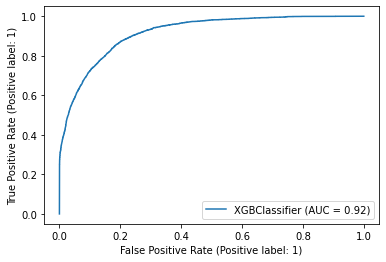

In [41]:
plot_roc_curve(xgb_best_estimator, X_test, y_test)

C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


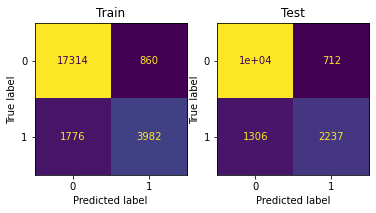

In [42]:
plot_cm(xgb, X_train, X_test, y_train, y_test)

C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


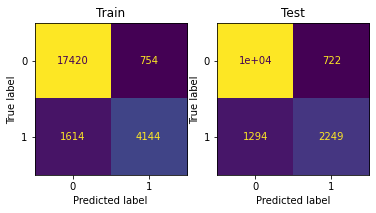

In [43]:
plot_cm(xgb_best_estimator, X_train, X_test, y_train, y_test)

W tym wypadku trojenie parametrów niewiele wniosło do naszego modelu.

##### Logisitc Regression - hiperparametry

In [44]:
search_space = {"penalty": [None, 'l1', 'l2', 'elasticnet'],
               "class_weight": ['dict', 'balanced'],
               "max_iter": [10,50,100,200]}

In [45]:
LR_model2 = LogisticRegression()

In [46]:
gscv = GridSearchCV(LR_model2, search_space, scoring="recall", verbose = 2, n_jobs=-1)

In [47]:
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\laura\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\laura\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\laura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 441, in _check_solver
    raise ValueError(
Va

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['dict', 'balanced'],
                         'max_iter': [10, 50, 100, 200],
                         'penalty': [None, 'l1', 'l2', 'elasticnet']},
             scoring='recall', verbose=2)

In [48]:
gscv.best_params_

{'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l2'}

In [49]:
LR_model_best_estimator = LogisticRegression(
    class_weight='balanced', max_iter=200, penalty='l2')

In [50]:
metrics_scores(LR_model, X_train, y_train)

Accuracy: 0.8166245819968607 
Recall: 0.4826418289585097 
Precision: 0.6669266770670826 
F1: 0.5600130997216308 
Gini: 0.4057741421898329


C:\Users\laura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
metrics_scores(LR_model_best_estimator, X_train, y_train)

Accuracy: 0.7658499965877295 
Recall: 0.8179508890770534 
Precision: 0.5098522167487685 
F1: 0.6281564972363716 
Gini: 0.5671858125694027


C:\Users\laura\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\laura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


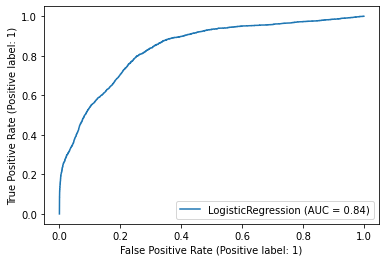

In [52]:
plot_roc_curve(LR_model, X_test, y_test)

C:\Users\laura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


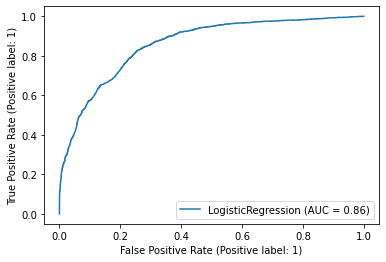

In [53]:
plot_roc_curve(LR_model_best_estimator, X_test, y_test)

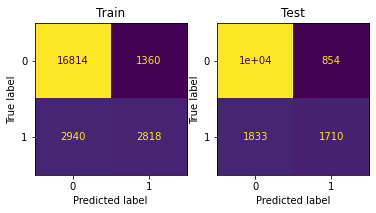

In [54]:
plot_cm(LR_model, X_train, X_test, y_train, y_test)

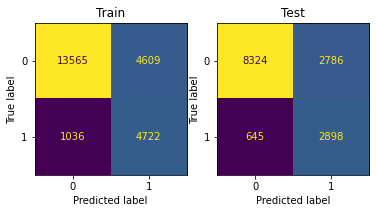

In [55]:
plot_cm(LR_model_best_estimator, X_train, X_test, y_train, y_test)

Tu również widzimy poprawę w działaniu modelu, jednak nie jest to jeszcze zadowalający wynik. 

Zatem najlepiej wypadły modele RandomForest oraz XGBoost.

## 5. Interpretowalność

In [56]:
import shap
from matplotlib import pyplot as plt

##### Logisitc Regression

In [57]:
LR_model = LR_model_best_estimator

In [58]:
explainer = shap.Explainer(LR_model_best_estimator.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 14654it [03:34, 65.35it/s]                           


In [59]:
X_val.columns

Index(['age', 'workclass', 'education_num', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'race_Black', 'race_White',
       'race_other', 'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'native_country_Mexico',
       'native_country_United-States', 'native_country_other'],
      dtype='object')

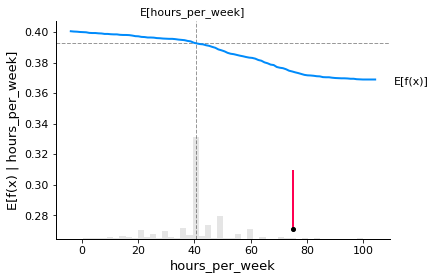

In [60]:
sample_ind = 1
plot = shap.partial_dependence_plot(
'hours_per_week', LR_model_best_estimator.predict, X_val, model_expected_value=True,
feature_expected_value=True, ice=False,
shap_values=shap_values[sample_ind:sample_ind+1,:]
)

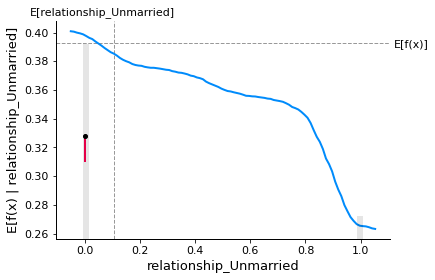

In [61]:
sample_ind = 1
plot = shap.partial_dependence_plot(
'relationship_Unmarried', LR_model_best_estimator.predict, X_val, model_expected_value=True,
feature_expected_value=True, ice=False,
shap_values=shap_values[sample_ind:sample_ind+1,:]
)

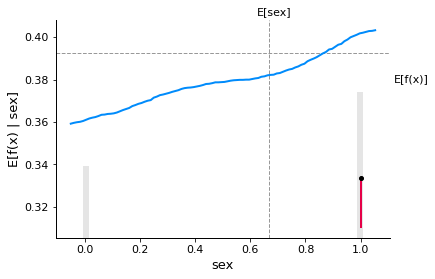

In [62]:
sample_ind = 1
plot = shap.partial_dependence_plot(
'sex', LR_model_best_estimator.predict, X_val, model_expected_value=True,
feature_expected_value=True, ice=False,
shap_values=shap_values[sample_ind:sample_ind+1,:]
)

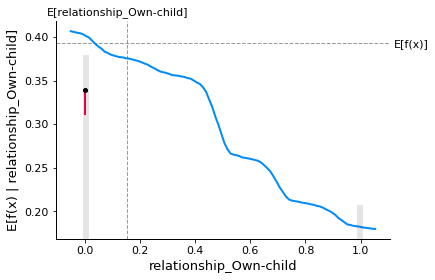

In [63]:
sample_ind = 1
plot = shap.partial_dependence_plot(
'relationship_Own-child', LR_model_best_estimator.predict, X_val, model_expected_value=True,
feature_expected_value=True, ice=False,
shap_values=shap_values[sample_ind:sample_ind+1,:]
)

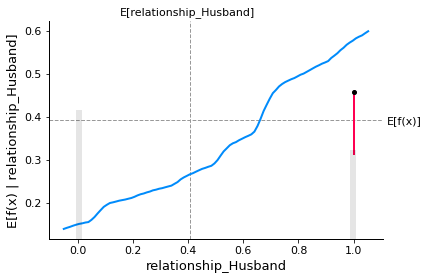

In [64]:
sample_ind = 1
plot = shap.partial_dependence_plot(
'relationship_Husband', LR_model_best_estimator.predict, X_val, model_expected_value=True,
feature_expected_value=True, ice=False,
shap_values=shap_values[sample_ind:sample_ind+1,:]
)

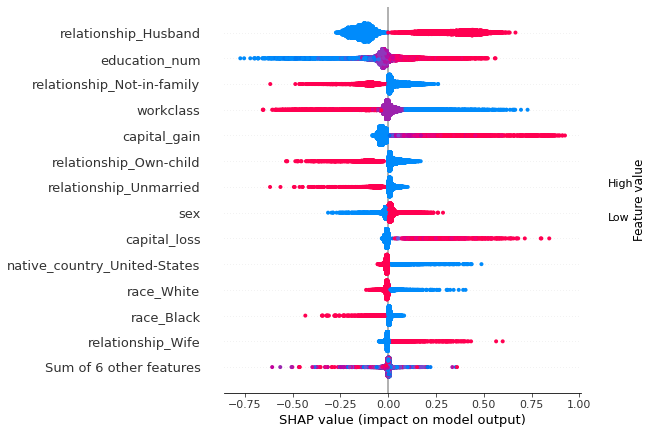

In [65]:
shap.plots.beeswarm(shap_values, max_display=14)

In [66]:
# shap.plots.heatmap(shap_values)

In [67]:
# shap.plots.bar(shap_values)

##### Random Forest

In [68]:
explainer = shap.TreeExplainer(rf_best_estimator, X_val)
sample = X_val.iloc[[420]]
shap_values = explainer.shap_values(sample)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], sample)

In [69]:
explainer = shap.TreeExplainer(rf_best_estimator, X_val)
sample = X_val.iloc[[25]]
shap_values = explainer.shap_values(sample)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], sample)

In [70]:
explainer = shap.TreeExplainer(rf_best_estimator, X_val)
sample = X_val.iloc[[122]]
shap_values = explainer.shap_values(sample)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], sample)

In [71]:
explainer = shap.TreeExplainer(rf_best_estimator, X_val)
sample = X_val.iloc[[400]]
shap_values = explainer.shap_values(sample)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], sample)